In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

SIZE = 10000

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/sayak_full_svd|2025-04-29/data.json"
# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_100|2025-05-06/data.json"

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_data|2025-03-06/data.json"
datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/wide_svd|2025-05-24/data.json"


In [2]:
# load the json, and normalize into a dataframe
with open(datafile) as f:
    df = pd.json_normalize(json.load(f), record_path=["snapshots"],
                           meta=[
                               ["settings", "patchImprovement"],
                               ["settings", "patchRecovery"],
                               ["settings", "maxCost"],
                               ["settings", "boundaryConditions"],
                               ["settings", "numLocations"],
                               ["settings", "randomSeedWalkers"],
                               ["settings", "randomSeedLocations"],
                            ])

# hopefully won't be necessary forever
# df["run_id"] = [i // 201 for i in range(df.shape[0])]

In [9]:
df["settings.boundaryConditions"].unique()

array(['PERIODIC', 'SOLID'], dtype=object)

In [4]:
df

,averageTravelCost,averageTravelLength,totalImprovement,thresholdImprovement,steps,paths,weightedHeadings,avgHeading,avgSquareHeading,patches,settings.patchImprovement,settings.patchRecovery,settings.maxCost,settings.boundaryConditions,settings.numLocations,settings.randomSeedWalkers,settings.randomSeedLocations
0,0.0,0.0,0.000000,0.0,0,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.01,0.0002,8.0,PERIODIC,20,1,1
1,0.0,0.0,4.880693,0.0,100,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.01,0.0002,8.0,PERIODIC,20,1,1
2,0.0,0.0,5.450471,0.0,200,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.01,0.0002,8.0,PERIODIC,20,1,1
3,0.0,0.0,5.309257,0.0,300,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.01,0.0002,8.0,PERIODIC,20,1,1
4,0.0,0.0,4.904274,0.0,400,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00256688...",0.01,0.0002,8.0,PERIODIC,20,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,0.0,0.0,638.697431,0.0,9600,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.02,0.0002,8.0,PERIODIC,10,8,2
16156,0.0,0.0,639.819535,0.0,9700,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.02,0.0002,8.0,PERIODIC,10,8,2
16157,0.0,0.0,642.247075,0.0,9800,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.02,0.0002,8.0,PERIODIC,10,8,2
16158,0.0,0.0,643.678273,0.0,9900,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.02,0.0002,8.0,PERIODIC,10,8,2


In [5]:
df["ratio"] = df["settings.patchImprovement"] / df["settings.patchRecovery"]

In [6]:
df["settings.patchRecovery"].unique()

array([0.0002, 0.002], dtype=object)

In [7]:
df["ratio"].unique()

array([50.0, 100.0], dtype=object)

In [51]:
finals = df[df["steps"] == 10000]

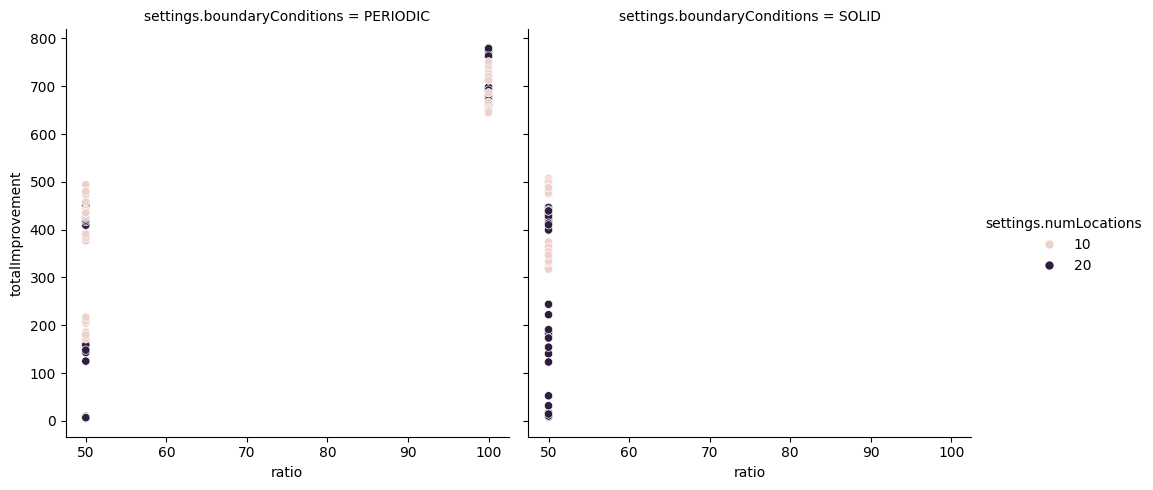

In [57]:
sns.relplot(data=finals, y="totalImprovement", x="ratio", hue="settings.numLocations", col="settings.boundaryConditions")

In [8]:
def svd(df):
    patches = df["patches"]

    num_observations = len(patches)
    num_features = len(patches.iloc[0])
    # observations as rows, features as columns
    A = np.reshape(patches.explode(), (num_observations, num_features)).astype(float)
    # we actually *don't* want to demean A. they are already appropriately scaled and as centered as they need to be!
    # A = A - np.mean(A, axis=0)
    U, S, Vh = np.linalg.svd(A, full_matrices=False)

    # svd weight
    N = 100

    s = S**2/sum(S**2)
    plt.bar([x for x in range(N)], s[:N])
    plt.show()
    
    # plot the eigen-trails
    fig, axs = plt.subplots(2, 4)
    for i in range(8):
        ax = axs[i//4, i%4]
        ax.imshow(np.reshape(Vh[i], (100, 100)))
        ax.set_title(f"{i}:, {round(s[i], 3)}")

    return U, S, Vh

IndexError: single positional indexer is out-of-bounds

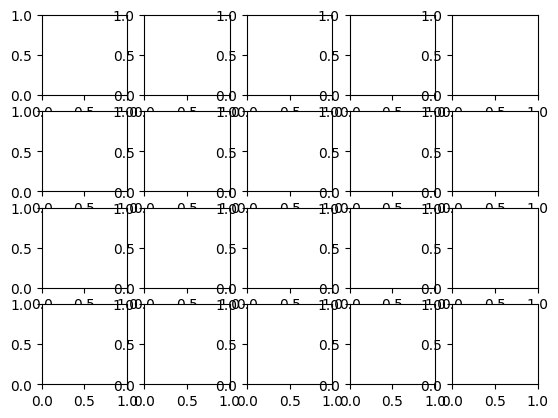

In [59]:
_finals = df[
    (df["steps"] == 10000) &
    (df["settings.patchRecovery"] == 0.002) &
    (df["ratio"] == 100.0) &
    (df["settings.numLocations"] == 20)
    # (df["settings.randomSeedLocations"] == 1) &
    # (df["settings.boundaryConditions"] == "PERIODIC")
]

fig, axs = plt.subplots(4, 5)
for i in range(20):
    ax = axs[i//5, i%5]
    ax.imshow(np.reshape(_finals["patches"].iloc[i], (100, 100)))

# for i in range(100):
#     plt.imshow(np.reshape(_finals["patches"].iloc[i], (100, 100)))
#     plt.show()

In [25]:
_finals

,averageTravelCost,averageTravelLength,totalImprovement,thresholdImprovement,steps,paths,weightedHeadings,avgHeading,avgSquareHeading,patches,settings.patchImprovement,settings.patchRecovery,settings.maxCost,settings.boundaryConditions,settings.numLocations,settings.randomSeedWalkers,settings.randomSeedLocations,ratio
13028,0.0,0.0,677.590728,0.0,10000,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.02,0.0002,8.0,PERIODIC,20,1,1,100.0
13129,0.0,0.0,715.272145,0.0,10000,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00256570...",0.02,0.0002,8.0,PERIODIC,20,2,1,100.0
13230,0.0,0.0,698.384117,0.0,10000,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.02,0.0002,8.0,PERIODIC,20,3,1,100.0
13331,0.0,0.0,660.918480,0.0,10000,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.02,0.0002,8.0,PERIODIC,20,4,1,100.0
13432,0.0,0.0,687.602391,0.0,10000,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.02,0.0002,8.0,PERIODIC,20,5,1,100.0
13533,0.0,0.0,682.657310,0.0,10000,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021...",0.02,0.0002,8.0,PERIODIC,20,6,1,100.0
13634,0.0,0.0,692.091487,0.0,10000,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000...",0.02,0.0002,8.0,PERIODIC,20,7,1,100.0
13735,0.0,0.0,670.638748,0.0,10000,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.02,0.0002,8.0,PERIODIC,20,8,1,100.0
14644,0.0,0.0,718.215421,0.0,10000,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.02,0.0002,8.0,PERIODIC,10,1,1,100.0
14745,0.0,0.0,734.989664,0.0,10000,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.02,0.0002,8.0,PERIODIC,10,2,1,100.0


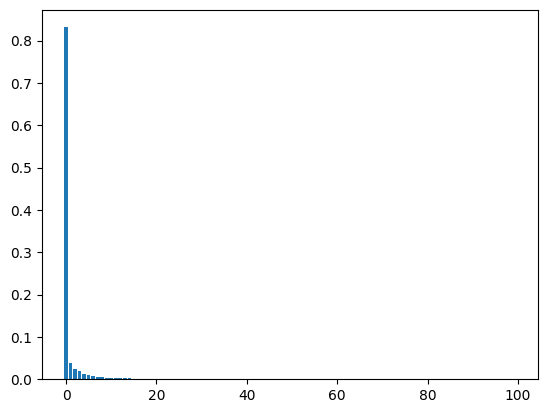

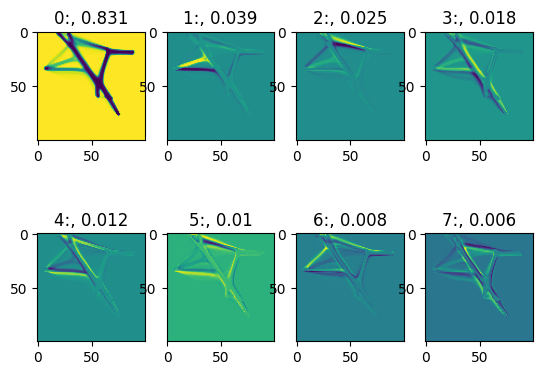

In [52]:
# just finals
U, S, Vh = svd(_finals)

In [ ]:
_finals = df[(df["steps"] == 20000) & (df["settings.patchRecovery"] == 0.0002)]

fig, axs = plt.subplots(4, 5)
for i in range(20):
    ax = axs[i//5, i%5]
    ax.imshow(np.reshape(_finals["patches"].iloc[i], (100, 100)))

# for i in range(100):
#     plt.imshow(np.reshape(_finals["patches"].iloc[i], (100, 100)))
#     plt.show()

In [ ]:
UU, SS, VVh = svd(df[(df["steps"] == 20000) & (df["settings.patchRecovery"] == 0.0002)]);

In [ ]:
# U, S, Vt = svd(df[(df["steps"] == 20000) & (df["settings.patchRecovery"] == 0.002)])

In [ ]:
# colors = ["red"] * 100 + ["blue"] * 100
# plt.scatter(U[:, 0], U[:, 1])

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(U[:, 0], U[:, 1], U[:, 2], c=colors, alpha=0.5)

In [ ]:
U.shape

In [ ]:
patches = df[(df["steps"] == 20000) & (df["settings.patchRecovery"] == 0.002)]["patches"]

num_observations = len(patches)
num_features = len(patches.iloc[0])
# observations as rows, features as columns
A = np.reshape(patches.explode(), (num_observations, num_features)).astype(float)
# we actually *don't* want to demean A. they are already appropriately scaled and as centered as they need to be!
# A = A - np.mean(A, axis=0)
U, S, Vh = np.linalg.svd(A, full_matrices=False)
V = Vh.T

In [ ]:
S.shape

In [ ]:
for i in range(5):
    df[f"U{i}"] = df["patches"].map(lambda p: p @ V[:, i] / S[i])

In [ ]:
jdf = df[df["settings.patchRecovery"] == 0.002]

In [ ]:
# for i in range(5):
#     sns.lineplot(data=jdf[jdf["steps"] <= 20000], x="steps", y=f"U{i}", hue="run_id", alpha=0.5)
#     plt.show()

In [ ]:
# patches = df[(df["steps"] == 20000) & (df["settings.patchRecovery"] == 0.0002)]["patches"]

# num_observations = len(patches)
# num_features = len(patches.iloc[0])
# # observations as rows, features as columns
# A = np.reshape(patches.explode(), (num_observations, num_features)).astype(float)
# # we actually *don't* want to demean A. they are already appropriately scaled and as centered as they need to be!
# # A = A - np.mean(A, axis=0)
# U, S, Vh = np.linalg.svd(A, full_matrices=False)
# V = Vh.T

# for i in range(5):
#     df[f"U{i}"] = df["patches"].map(lambda p: p @ V[:, i] / S[i])

sdf = df[df["settings.patchRecovery"] == 0.0002]

for i in range(5):
    sns.lineplot(data=sdf[sdf["steps"] <= 20000], x="steps", y=f"U{i}", hue="run_id", alpha=0.5)
    plt.show()

In [ ]:
sns.relplot(data=sdf, x="U1", y="U2", hue="steps")